In [1]:
import os

import numpy as np
import scipy.integrate as integrate
import scipy.interpolate as interp
import scipy.ndimage as ndi

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['text.usetex'] = True

from migdalcalc import migdalcalc as mc
from migdalcalc.migdal import kinematics as kin

In [2]:
Xe128 = mc.migdalcalc(target="Xe-128", nuclear_data_name="jendl40")
Xe129 = mc.migdalcalc(target="Xe-129", nuclear_data_name="jendl40")
Xe130 = mc.migdalcalc(target="Xe-130", nuclear_data_name="jendl40")
Xe131 = mc.migdalcalc(target="Xe-131", nuclear_data_name="jendl40")
Xe132 = mc.migdalcalc(target="Xe-132", nuclear_data_name="jendl40")
Xe134 = mc.migdalcalc(target="Xe-134", nuclear_data_name="jendl40")
Xe136 = mc.migdalcalc(target="Xe-136", nuclear_data_name="jendl40")

Xe_isotopes = [Xe128, Xe129, Xe130, Xe131, Xe132, Xe134, Xe136]

DD_energy = 2.5e6
DT_energy = 1.4e7

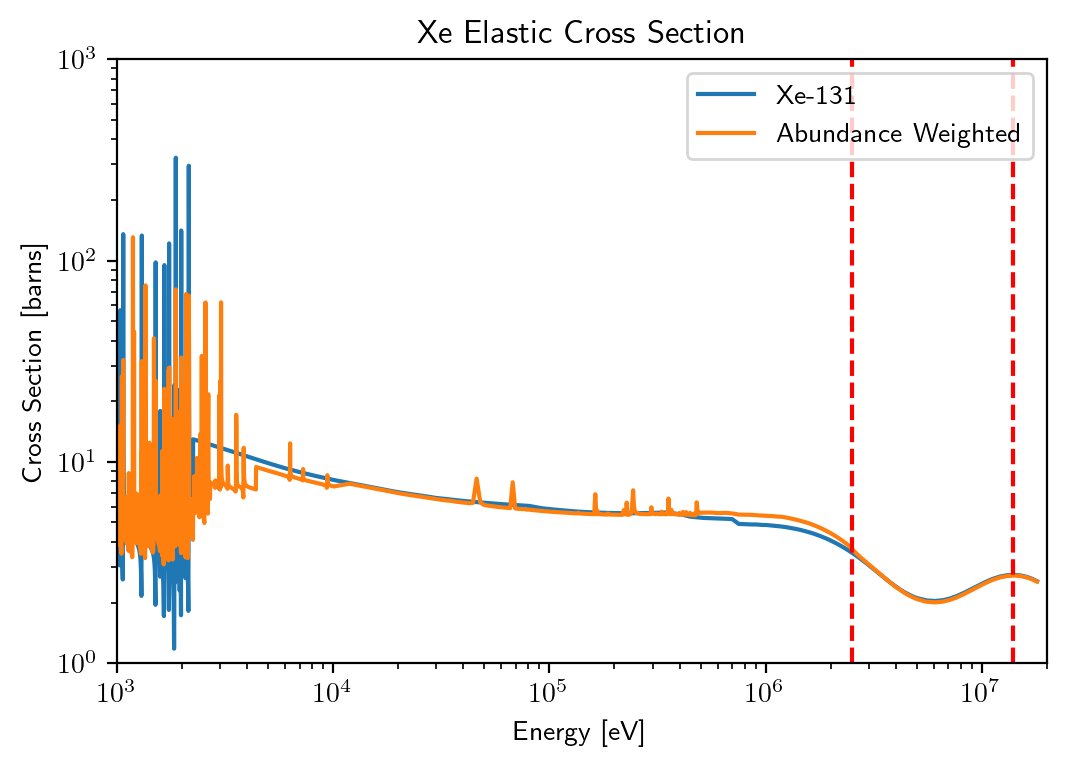

In [3]:
En_range = np.concatenate((np.geomspace(1e3,1e4, 1000), np.linspace(1.01e4, 1.8e7, 10000)))

xsec_arr = []
for En in En_range:
    xsec = 0
    for Xe in Xe_isotopes:
        xsec += Xe.abundance*Xe.nuc.SIG(En)
    
    xsec_arr.append(xsec)
    
plt.plot(En_range, Xe131.nuc.SIG(En_range), label='Xe-131')
    
plt.plot(En_range, xsec_arr, label='Abundance Weighted')
plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.ylim(1, 1000)
plt.xlim(1e3, 2e7)

plt.xlabel('Energy [eV]')
plt.ylabel('Cross Section [barns]')
plt.title('Xe Elastic Cross Section')


xmin, xmax, ymin, ymax = plt.axis()


plt.vlines([DD_energy, DT_energy], ymin, ymax, linestyle='dashed', color='red')

plt.show()
    

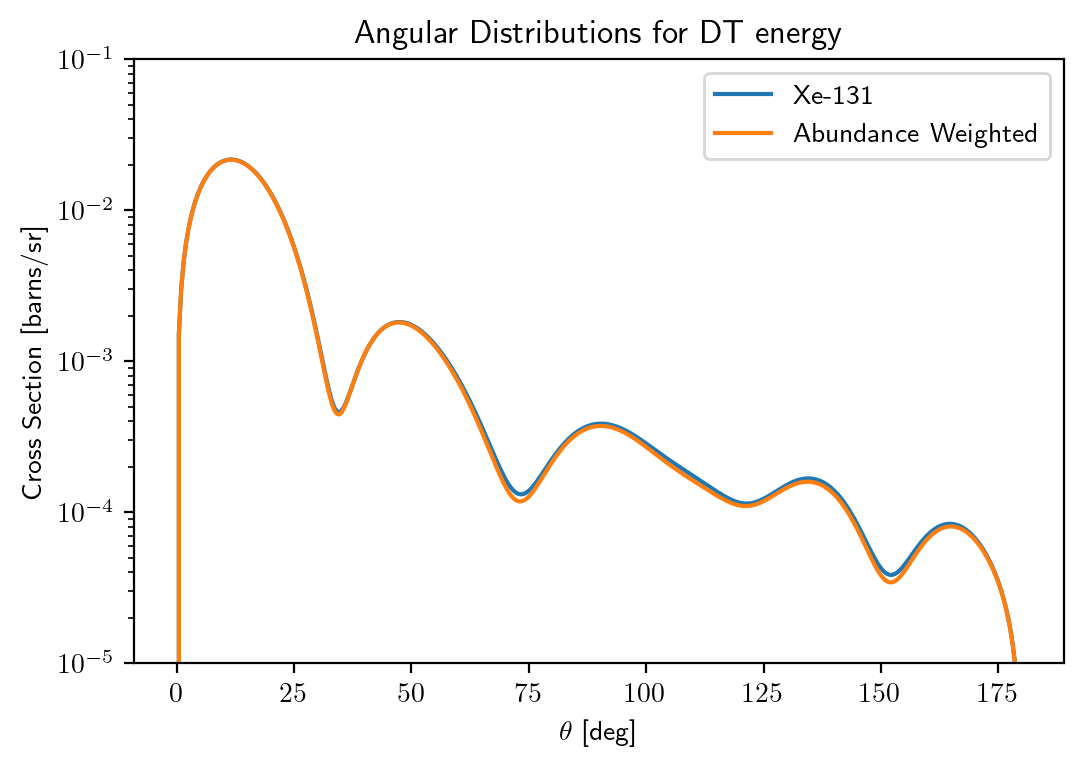

In [7]:
angles = np.linspace(0, 180, 360)
cos_range = np.linspace(-1, 1)

xsec_arr = []

for angle in angles:
    xsec = 0
    for Xe in Xe_isotopes:
        angular_dist = Xe.nuc.dSig_dOmega(DT_energy)
        xsec += Xe.abundance*(np.pi/180)*np.sin(np.pi*angle/180)*angular_dist(np.cos(np.pi*angle/180))

    xsec_arr.append(xsec)


angular_dist131 = Xe131.nuc.dSig_dOmega(DT_energy)
plt.plot(angles, (np.pi/180)*np.sin(np.pi*angles/180)*angular_dist131(np.cos(np.pi*angles/180)), label='Xe-131')
plt.plot(angles, xsec_arr, label='Abundance Weighted')

plt.legend()

plt.title('Angular Distributions for DT energy')
plt.yscale('log')
plt.ylim(1e-5, 1e-1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Cross Section [barns/sr]')
plt.show()

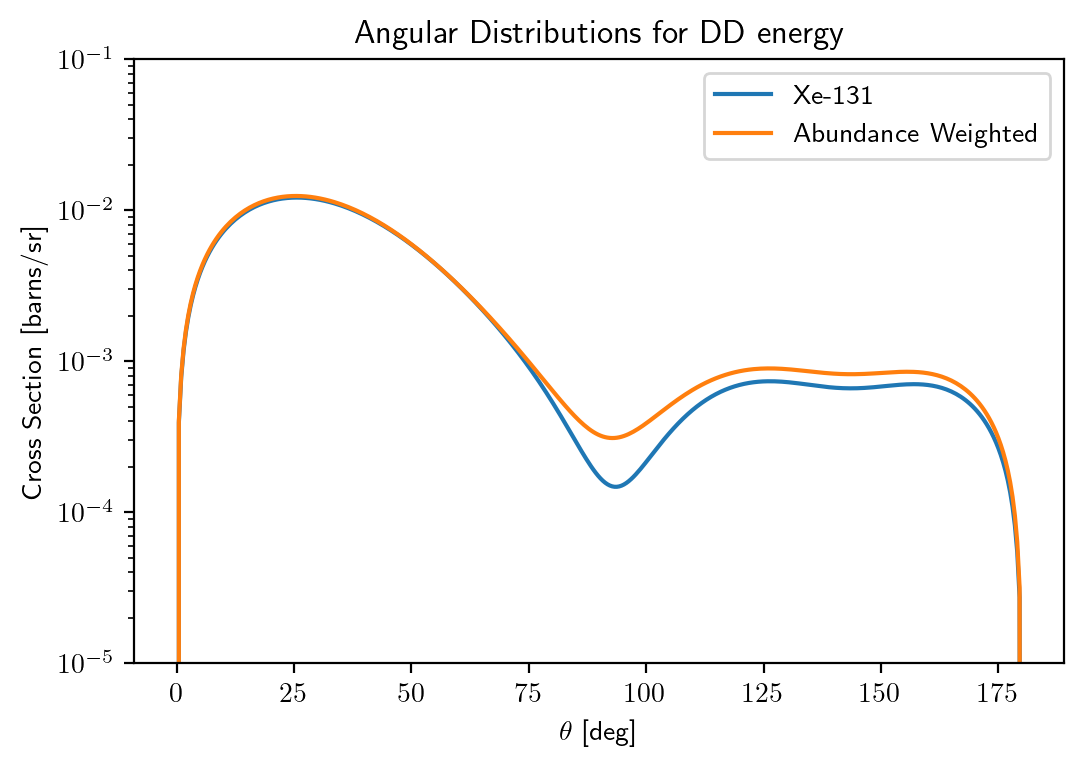

In [8]:
angles = np.linspace(0, 180, 360)
cos_range = np.linspace(-1, 1)

xsec_arr = []

for angle in angles:
    xsec = 0
    for Xe in Xe_isotopes:
        angular_dist = Xe.nuc.dSig_dOmega(DD_energy)
        xsec += Xe.abundance*(np.pi/180)*np.sin(np.pi*angle/180)*angular_dist(np.cos(np.pi*angle/180))

    xsec_arr.append(xsec)


angular_dist131 = Xe131.nuc.dSig_dOmega(DD_energy)
plt.plot(angles, (np.pi/180)*np.sin(np.pi*angles/180)*angular_dist131(np.cos(np.pi*angles/180)), label='Xe-131')
plt.plot(angles, xsec_arr, label='Abundance Weighted')

plt.legend()

plt.title('Angular Distributions for DD energy')
plt.yscale('log')
plt.ylim(1e-5, 1e-1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Cross Section [barns/sr]')
plt.show()